# Data Science Task_3 (Movie Recommendation System) 

<b> Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

<b>Load Datasets 
- Store Movies dataset in df_m
- while the credits in df_c

In [2]:
df_m = pd.read_csv("tmdb_5000_movies.csv")
df_c = pd.read_csv("tmdb_5000_credits.csv")

<b>Explore the DataSet
- Check for columns
- Check the Shape of Both Datasets

In [3]:
print(df_m.columns)
print('\n')        #just a new line 
print(df_c.columns)

print('\n\nShape of Movies DataFrame \n' + str(df_m.shape))
print('Shape of Credits DataFrame \n' + str(df_c.shape))

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


Shape of Movies DataFrame 
(4803, 20)
Shape of Credits DataFrame 
(4803, 4)


<b> NULL Values 
- check for total null values in the both dataframe

In [4]:
df_m.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

<b>Insight:
- homepage has alot of null value
- tagline has also null value as compare to other

In [5]:
df_c.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

<b> Insight:
- The Credit dataframe has no null values

<Axes: >

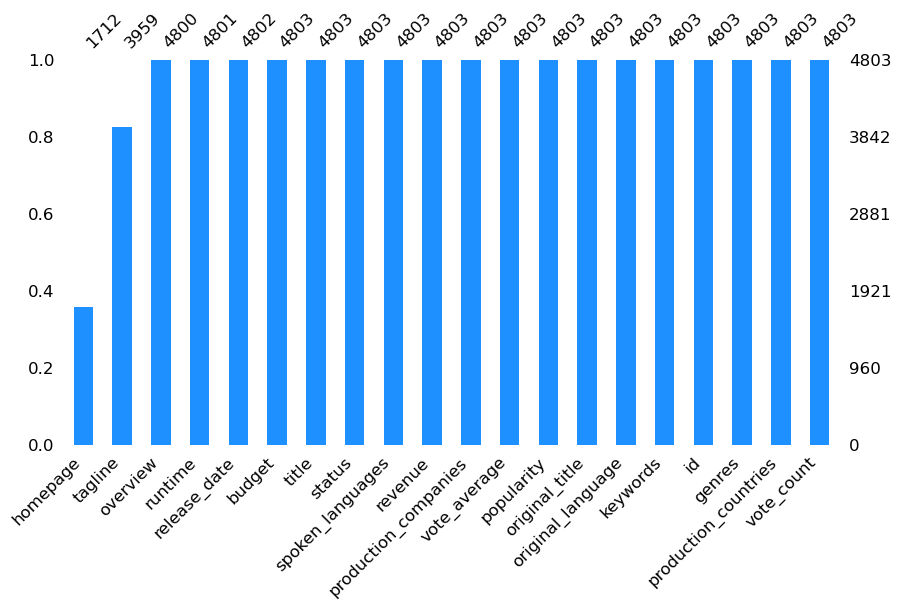

In [6]:
import missingno
missingno.bar(df_m, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

- As You can from visualization of Null value 

<b> Merge Both DataFrame

In [7]:
movies = df_m.merge(df_c, on = 'title')

In [8]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


<b>Drop Uneccesary Columns 

In [9]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']] 
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [10]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [11]:
movies.dropna(inplace = True)

<b>Insight:
- The null values are small in numbers so thats is why it drop

<b>Recommendation System

Recommender Systems simply put, are AI algorithms that utilize Big Data to suggest additional products to consumers based on a variety of features. These recommendations can be based on factors such as past purchases, demographic info, their search history, time spent reviewing the product or a like, dislike or a comment left behind by these consumers.The idea of Recommender Systems is that if you can narrow down the pool of selection options for your customers to a few meaningful and relevant choices, they are more likely to make a purchase now, as well as come back for more down the road.

<b>Collaborative Filtering

The Collaborative filtering method for recommender systems is a method that is solely based on the past interactions that have been recorded between users and items, in order to produce new recommendations. Collaborative Filtering tends to find what similar users would like and the recommendations to be provided and in order to classify the users into clusters of similar types and recommend each user according to the preference of its cluster. The main idea that governs the collaborative methods is that through past user-item interactions when processed through the system, it becomes sufficient to detect similar users or similar items to make predictions based on these estimated facts and insights.

<b>Content-based Filtering

The content-based approach uses additional information about users and/or items. This filtering method uses item features to recommend other items similar to what the user likes and also based on their previous actions or explicit feedback.

The main idea of content-based methods is to try to build a model, based on the available “features”, that explain the observed user-item interactions.

Such a model helps us in making new predictions for a user pretty easily, with just a look at the profile of this user and based on its information, to determine relevant movies to suggest.

<b>Data Pre-Process

In [12]:
import ast

def convert(obj): 
    L = []
    for i in ast.literal_eval(obj): 
        L.append(i['name'])
    return L

In [13]:
movies['genres'] = movies['genres'].apply(convert)

In [14]:
movies['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

In [15]:
movies["keywords"] = movies['keywords'].apply(convert)
movies['cast'] = movies['cast'].apply(convert)

In [16]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


- We are only left with Crew we will only fetch the director from the crew column

In [17]:
def fetch_director(obj): 
    L = []
    for i in ast.literal_eval(obj): 
        if i ['job'] == "Director":
            L.append(i['name']) 
    return L

In [18]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [19]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [20]:
#Convert other strings into list. Remove spaces
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ", "") for i in x]) 
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ", "") for i in x]) 
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ", "") for i in x]) 
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

In [21]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


# Visualization

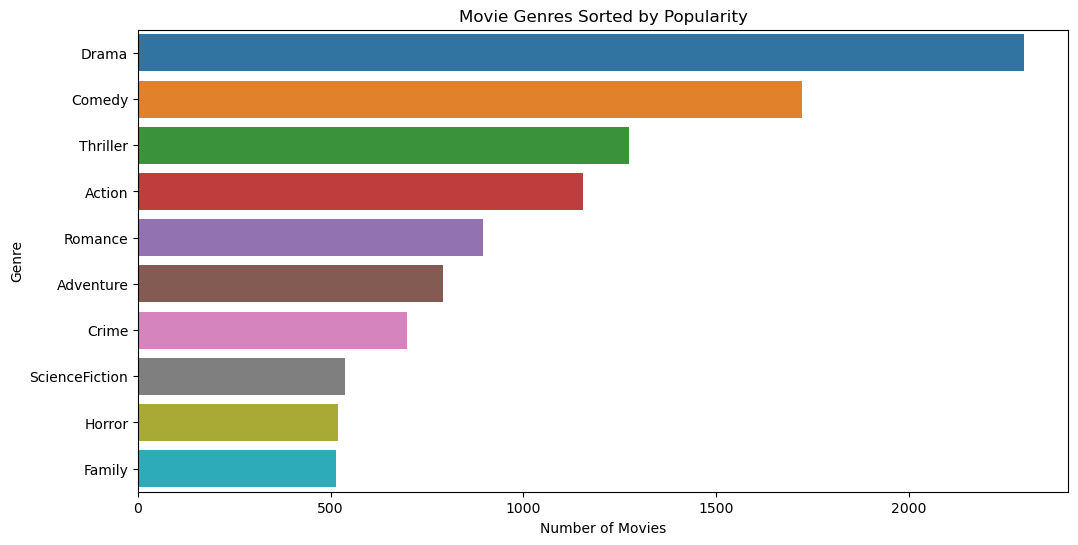

In [22]:
genre_counts = movies['genres'].explode().value_counts()

# Sort genres by popularity
genre_counts_sorted = genre_counts.sort_values(ascending=False)

# Create a bar chart of movie genres sorted by popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts_sorted.iloc[0:10].values, y=genre_counts_sorted.iloc[0:10].index)
plt.title('Movie Genres Sorted by Popularity')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

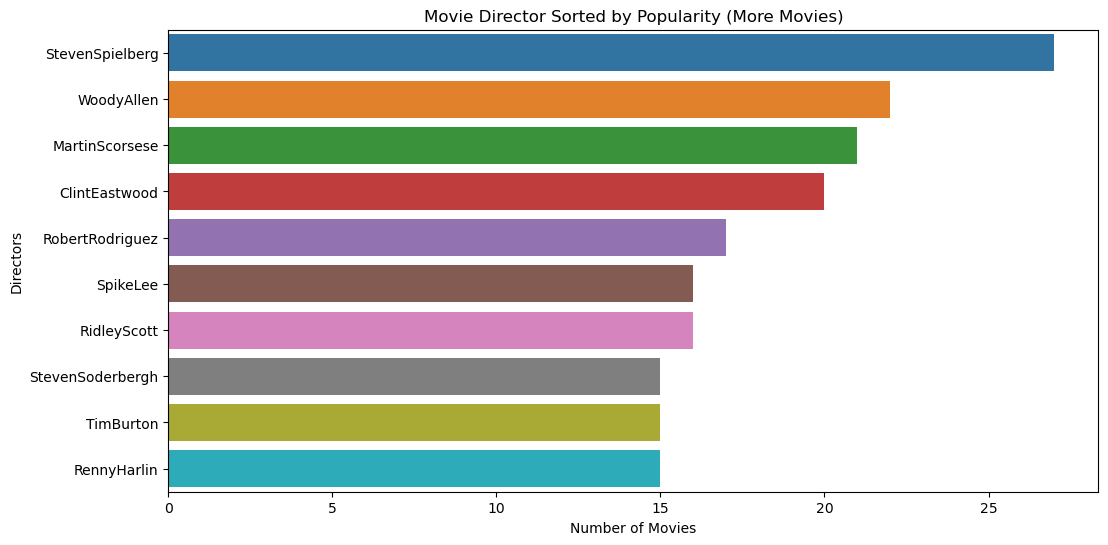

In [23]:
genre_counts = movies['crew'].explode().value_counts()

# Sort genres by popularity
genre_counts_sorted = genre_counts.sort_values(ascending=False)

# Create a bar chart of movie genres sorted by popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts_sorted.iloc[0:10].values, y=genre_counts_sorted.iloc[0:10].index)
plt.title('Movie Director Sorted by Popularity (More Movies)')
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.show()

<b> Insight:
- Director and how many movies they publish/directed
- As you see the S.tevenSoder bergh, TimBurton, RennyHarlin has directed same number of movies

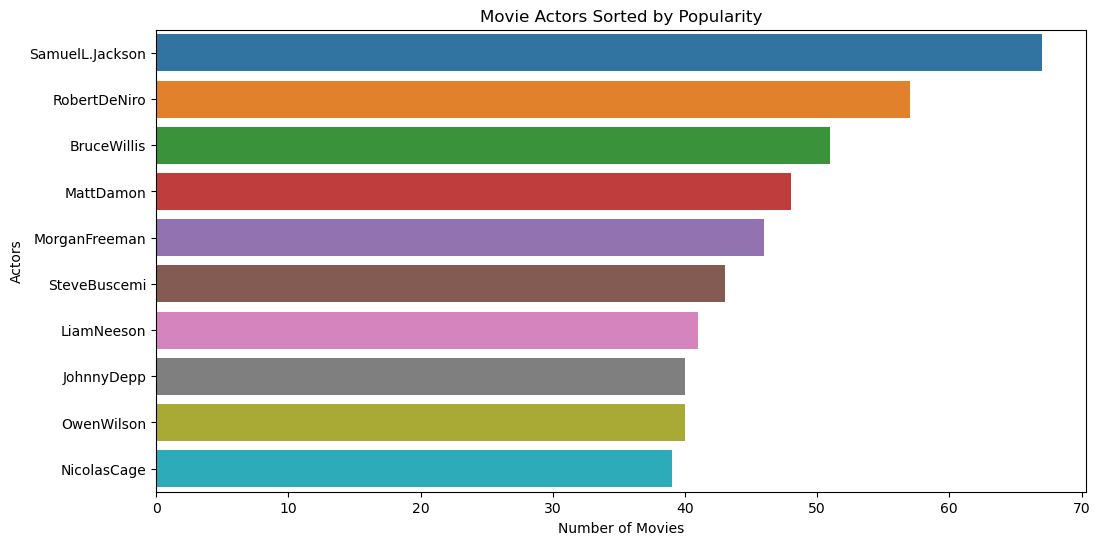

In [24]:
genre_counts = movies['cast'].explode().value_counts()

# Sort genres by popularity
genre_counts_sorted = genre_counts.sort_values(ascending=False)

# Create a bar chart of movie genres sorted by popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts_sorted.iloc[0:10].values, y=genre_counts_sorted.iloc[0:10].index)
plt.title('Movie Actors Sorted by Popularity')
plt.xlabel('Number of Movies')
plt.ylabel('Actors')
plt.show()

# Recommendation

In [25]:
#Combine all the columns
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [26]:
#kept the most important one
new_df = movies[["movie_id","title","tags"]] 
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


<b>Using NLTK and PorterStemmer for Recommendation and processing the tags column

In [27]:
import nltk
from nltk.stem.porter import PorterStemmer 

ps = PorterStemmer()

In [28]:
def stem(text): 
    y = []
    for i in text.split(): 
        y.append(ps.stem(i))
        
    return " ".join(y)

In [29]:
new_df['tags'] = new_df["tags"].apply(lambda x:" ".join(x))

C:\Users\FARAZ\AppData\Local\Temp\ipykernel_13536\2659565096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df["tags"].apply(lambda x:" ".join(x))


In [30]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

C:\Users\FARAZ\AppData\Local\Temp\ipykernel_13536\3214958533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [31]:
new_df['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez giovanniribisi joeldavidmoore cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyte scottlawrence kellykilgour jamespatrickpitt seanpatrickmurphy peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurry lukehawker woodyschultz petermensah soniayee jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibby jodielandau julielamm cullenb.madden josephbradymadden frankietorres austinwilson sarawilson tamicawashington-miller lucybriant nathanm

In [32]:
new_df['tags'] = new_df["tags"].apply(lambda x: stem(x))

C:\Users\FARAZ\AppData\Local\Temp\ipykernel_13536\1757774940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df["tags"].apply(lambda x: stem(x))


In [33]:
new_df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang michellerodriguez giovanniribisi joeldavidmoor cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyt scottlawr kellykilgour jamespatrickpitt seanpatrickmurphi peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurri lukehawk woodyschultz petermensah soniaye jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibbi jodielandau julielamm cullenb.madden josephbradymadden frankietorr austinwilson sarawilson tamicawashington-mil lucybri nathanmeist gerryblair matthewchamberlain paulyat wraywil

<b>Matrix Factorization

Latent factor models compress user-item matrix into a low-dimensional representation in terms of latent factors. One advantage of using this approach is that instead of having a high dimensional matrix containing abundant number of missing values we will be dealing with a much smaller matrix in lower-dimensional space.

A reduced presentation could be utilized for either user-based or item-based neighborhood algorithms that are presented in the previous section. There are several advantages with this paradigm. It handles the sparsity of the original matrix better than memory based ones. Also comparing similarity on the resulting matrix is much more scalable especially in dealing with large sparse datasets.

An important decision is the number of factors to factor the user-item matrix. The higher the number of factors, the more precise is the factorization in the original matrix reconstructions. Therefore, if the model is allowed to memorize too much details of the original matrix, it may not generalize well for data it was not trained on. Reducing the number of factors increases the model generalization.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer 

cv = CountVectorizer(max_features=5000,stop_words='english')

In [35]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [36]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
vector.shape

(4806, 5000)

In [38]:
#Generate pairwise similarity matrix using cosing similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vector)

In [39]:
similarity.shape

(4806, 4806)

In [40]:
similarity

array([[1.        , 0.06666667, 0.07559289, ..., 0.0421637 , 0.        ,
        0.        ],
       [0.06666667, 1.        , 0.07559289, ..., 0.02108185, 0.        ,
        0.02222222],
       [0.07559289, 0.07559289, 1.        , ..., 0.02390457, 0.        ,
        0.        ],
       ...,
       [0.0421637 , 0.02108185, 0.02390457, ..., 1.        , 0.04264014,
        0.0421637 ],
       [0.        , 0.        , 0.        , ..., 0.04264014, 1.        ,
        0.08989331],
       [0.        , 0.02222222, 0.        , ..., 0.0421637 , 0.08989331,
        1.        ]])

<b>Recommendations

Using the pairwise similarity matrix to generate recommendations between movies

In [41]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1]) 
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [42]:
print(f'\033[94m')
recommend('Spectre')


Skyfall
Quantum of Solace
Never Say Never Again
From Russia with Love
Safe Haven


In [43]:
print(f'\033[94m')
recommend('John Carter')


Krrish
Riddick
The Other Side of Heaven
The Legend of Hercules
Get Carter


- END